# Assignment 01
# Sentiment Analysis on Bengali Text
---


```
Dataset : https://github.com/Ayubur/bangla-sentiment-analysis-datasets
```




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import regex as re
#from bnlp import BasicTokenizer
#from bangla_stemmer.stemmer import stemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#!pip install bnlp_toolkit
#pip install bangla-stemmer

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive/')

In [ ]:
file_path1 = '/content/drive/MyDrive/Colab Notebooks/bangla-sentiment-analysis-datasets/Dataset/BanglaSentimentAnalysisData/comments/CommentsOutputFileEkattorTV.xlsx'
#file_path2 = '/content/drive/MyDrive/Colab Notebooks/bangla-sentiment-analysis-datasets/Dataset/BanglaSentimentAnalysisData/comments/CommentsOutputImranHSarker.xlsx'

df = pd.read_excel(file_path1)
#df2 = pd.read_excel(file_path2)
#df = pd.concat([df1, df2], axis=0, ignore_index=True)

new_column_names = ['Index', 'text', 'emotion']
df. columns = new_column_names

# Display the first few rows of the dataframe
#print(df.head(15))
#df = df.drop(index=[0,1,2,3,4,5,6,7,3659,3660,3661,3662,3663,3664,3665,3666])
df = df.drop(index=[0,1,2,3,4,5,6,7])
df = df.dropna()  # Drop rows with any missing values
df.reset_index(drop=True, inplace=True)  # Reset the index
# Generate sequential integers starting from 1
df['Index'] = range(1, len(df) + 1)

# Display the DataFrame after replacing the values in the "number" column
print(df)

      Index                                               text emotion
0         1  বরাবর, মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী বা...     sad
1         2  তদন্ত করে লাভ কী ? কোন দিন কোন তদন্তের পর কিছু...     sad
2         3  দেশকি মধ্যম আয়ের দেশে রুপান্তর হচ্ছে নাকি মগের...   angry
3         4  আমি গর্বিত আমি মুসলিম। আমি সংগ্রামী। আমি যোদ্ধ...   happy
4         5                        রাতের বেলা আবার কিসের সকাল।   angry
...     ...                                                ...     ...
1016   1017                                                ভাল   happy
1017   1018                           জয় হউক মানবতার..........   happy
1018   1019                    চোখের পানি ধরে রাখতে পারলাম না!     sad
1019   1020  ব্রেকিং নিউজ, সবার জন্য দারুন খবর, http://bkas...   happy
1020   1021  সুখবর সুখবর সুখবর আমরা যাদের কে #বাংলা ১ম এবং ...   happy

[1021 rows x 3 columns]


# Data Cleaning
---
Removed

1.   Punctuations
2.   English Alphabets
3.   Unnecessary Symbols




In [ ]:
import regex as re
def clean_text(text):
    # Define a regex pattern to match Bengali Unicode characters
    bengali_pattern = re.compile('[\p{Bengali}\s]+', re.UNICODE)

    # Extract only Bengali words from the text
    cleaned_text = ' '.join(re.findall(bengali_pattern, text))

    return cleaned_text

# Apply the clean_text function to the 'text' column of your DataFrame
df['cleaned_text'] = df['text'].apply(clean_text)

# Display the cleaned DataFrame
print(df.head(20))

    Index                                               text  emotion  \
0       1  বরাবর, মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী বা...      sad   
1       2  তদন্ত করে লাভ কী ? কোন দিন কোন তদন্তের পর কিছু...      sad   
2       3  দেশকি মধ্যম আয়ের দেশে রুপান্তর হচ্ছে নাকি মগের...    angry   
3       4  আমি গর্বিত আমি মুসলিম। আমি সংগ্রামী। আমি যোদ্ধ...    happy   
4       5                        রাতের বেলা আবার কিসের সকাল।    angry   
5       6  মনে রাকবেন এই বেহাইয়াপনাতে মা ও বোনদের সসম্মান...      sad   
6       7  কবে যানি ভূকম্পনে এ রমনা বটমূল মাটির সাথে মিশে...  disgust   
7       8                                নাস্তিকরা কমতেছে তো    angry   
8       9  এবার লোকসমাগম খুব কম হয়েছে যা প্রশ্নই থেকে যায়...  surpise   
9      10                         কেয়ামতের  তোমাদের ছায়া নট।      sad   
10     11                     কেয়ামতের মাঠে তোমাদের ছাড়া নট।     fear   
11     12  বাংলাদেশের নদীর ওপর ভারতীয় আগ্রাসনের বিরুদ্ধে ...    angry   
12     13  শফিক রেহমান এক জন পীর...............।। হ

# Tokenization
---
Tokenization is the process of breaking a stream of text up into sentences, words, phrases, symbols, or other meaningful elements called tokens.

**From BNLP Toolkit**

In [ ]:
# Initialize the tokenizer
tokenizer = BasicTokenizer()

# Tokenize the text in the 'text' column of your DataFrame
df['tokens'] = df['cleaned_text'].apply(tokenizer.tokenize)

# Display the DataFrame with the tokenized text
print(df.head())

   Index                                               text emotion  \
0      1  বরাবর, মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী বা...     sad   
1      2  তদন্ত করে লাভ কী ? কোন দিন কোন তদন্তের পর কিছু...     sad   
2      3  দেশকি মধ্যম আয়ের দেশে রুপান্তর হচ্ছে নাকি মগের...   angry   
3      4  আমি গর্বিত আমি মুসলিম। আমি সংগ্রামী। আমি যোদ্ধ...   happy   
4      5                        রাতের বেলা আবার কিসের সকাল।   angry   

                                        cleaned_text  \
0  বরাবর  মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী বা...   
1  তদন্ত করে লাভ কী   কোন দিন কোন তদন্তের পর কিছু...   
2  দেশকি মধ্যম আয়ের দেশে রুপান্তর হচ্ছে নাকি মগের...   
3  আমি গর্বিত আমি মুসলিম  আমি সংগ্রামী  আমি যোদ্ধ...   
4                         রাতের বেলা আবার কিসের সকাল   

                                              tokens  
0  [বরাবর, মাননীয়, প্রধানমন্ত্রী, গণপ্রজাতন্ত্রী...  
1  [তদন্ত, করে, লাভ, কী, কোন, দিন, কোন, তদন্তের, ...  
2  [দেশকি, মধ্যম, আয়ের, দেশে, রুপান্তর, হচ্ছে, না...  
3  [আমি, গর্বিত,

# Stop Words Removal


---
Removed words are from Stopword-Bn.txt file in the Dataset










In [ ]:
# Read stopwords from the .txt file
stopwords_file_path = '/content/drive/MyDrive/Colab Notebooks/bangla-sentiment-analysis-datasets/Stopwords/stopwords-bn.txt'
with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    custom_stopwords = [word.strip() for word in file.readlines()]

# Function to remove stopwords from a list of tokens
def remove_stopwords(tokens):
    # Filter out custom stopwords
    filtered_tokens = [token for token in tokens if token not in custom_stopwords]
    return filtered_tokens

# Apply the remove_stopwords function to the 'tokens' column of your DataFrame
df['tokens_without_stopwords'] = df['tokens'].apply(remove_stopwords)

# Display the DataFrame with the tokenized text and stopwords removed
print(df.head())


   Index                                               text emotion  \
0      1  বরাবর, মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী বা...     sad   
1      2  তদন্ত করে লাভ কী ? কোন দিন কোন তদন্তের পর কিছু...     sad   
2      3  দেশকি মধ্যম আয়ের দেশে রুপান্তর হচ্ছে নাকি মগের...   angry   
3      4  আমি গর্বিত আমি মুসলিম। আমি সংগ্রামী। আমি যোদ্ধ...   happy   
4      5                        রাতের বেলা আবার কিসের সকাল।   angry   

                                        cleaned_text  \
0  বরাবর  মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী বা...   
1  তদন্ত করে লাভ কী   কোন দিন কোন তদন্তের পর কিছু...   
2  দেশকি মধ্যম আয়ের দেশে রুপান্তর হচ্ছে নাকি মগের...   
3  আমি গর্বিত আমি মুসলিম  আমি সংগ্রামী  আমি যোদ্ধ...   
4                         রাতের বেলা আবার কিসের সকাল   

                                              tokens  \
0  [বরাবর, মাননীয়, প্রধানমন্ত্রী, গণপ্রজাতন্ত্রী...   
1  [তদন্ত, করে, লাভ, কী, কোন, দিন, কোন, তদন্তের, ...   
2  [দেশকি, মধ্যম, আয়ের, দেশে, রুপান্তর, হচ্ছে, না...   
3  [আমি, গর্

# Normalization - Stemming
---
**Stemming** = heuristically removing the affixes of a word, to get its stem (root)
```
# from bangla_stemmer.stemmer import stemmer
```

In [ ]:
#pip install bangla-stemmer
from bangla_stemmer.stemmer import stemmer

In [ ]:
# Initialize the stemmer
stem = stemmer.BanglaStemmer()

# Function to perform stemming on a list of tokens
def stem_tokens(tokens):
    # Stem each token
    stemmed_tokens = [stem.stem(token) for token in tokens]
    return stemmed_tokens

# Apply the stem_tokens function to the 'tokens_without_stopwords' column of your DataFrame
df['normalized_tokens'] = df['tokens_without_stopwords'].apply(stem_tokens)

# Display the DataFrame with the normalized tokens
print(df.head())

# Word Embedding
---
All texts need to be converted to numbers before starts processing by the machine. Specifically, vectors of numbers.

1.   TF-IDF : Term Frequency-Inverse Document Frequency
2.   BoW : Bag of Words





In [ ]:
# Combine tokens back into documents
corpus = [' '.join(tokens) for tokens in df['normalized_tokens']]

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()

# Print TF-IDF vectors
print("TF-IDF Vectors:")
print(tfidf)

# Sort vocabulary and print terms with TF-IDF values
#dictionary = sorted(tfidf_vectorizer.vocabulary_)

TF-IDF Vectors:
[[0.        0.        0.0465348 ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]


In [ ]:
# Combine tokens back into documents
corpus = [' '.join(tokens) for tokens in df['normalized_tokens']]

# Initialize the CountVectorizer
count_vectorizer = CountVectorizer()

# Convert documents to Bag-of-Words representation
bow = count_vectorizer.fit_transform(corpus).toarray()

# Print BoW vectors
print("Bag-of-Words (BoW) Vectors:")
print(bow)

# Sort vocabulary and print terms with BoW values
#dictionary = sorted(count_vectorizer.vocabulary_)

Bag-of-Words (BoW) Vectors:
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Label Encoding & Data Split
---



In [ ]:
labels = df['emotion']

# Encode the labels using LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
print(encoded_labels)

# Split the dataset into training and testing sets (90% train, 10% test)
#X_train, X_test, y_train, y_test = train_test_split(tfidf, encoded_labels, test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(tfidf, encoded_labels, test_size=0.1, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

[4 4 0 ... 4 3 3]
X_train shape: (918, 1249)
X_test shape: (103, 1249)
y_train shape: (918,)
y_test shape: (103,)


# **Logistic Regression**
---



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Instantiate and train the logistic regression model
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = logistic_regression_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.42718446601941745
Precision: 0.36670222980902595
Recall: 0.42718446601941745


# **CNN**
---



In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Dropout
from sklearn.preprocessing import LabelBinarizer
precision_score, recall_score
# Convert labels to one-hot encoding
label_binarizer = LabelBinarizer()
y_train_encoded = label_binarizer.fit_transform(y_train)
y_test_encoded = label_binarizer.transform(y_test)

# Reshape TF-IDF/boW vectors for input into Conv1D layer
X_train_reshaped = np.expand_dims(X_train, axis=2)
X_test_reshaped = np.expand_dims(X_test, axis=2)

# Define the CNN model
model = Sequential()
model.add(Conv1D(128, 3, activation='relu', input_shape=(X_train.shape[1], 1)))

model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(label_binarizer.classes_), activation='softmax'))


model.summary()
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[['accuracy']])

# Train the model
cnn = model.fit(X_train_reshaped, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test_encoded))


# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1247, 128)         512       
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 9158 (35.77 KB)
Trainable params: 9158 (35.77 KB)
Non-trainable params: 0 (0.00 Byte)
______________________

# **RNN**
---



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding, GlobalMaxPooling1D, Dropout

# Define the RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(128, input_shape=(X_train.shape[1], 1), activation='relu'))
#rnn_model.add(Dense(64, activation='relu'))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(len(label_binarizer.classes_), activation='softmax'))

# Compile the model
rnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
rnn = rnn_model.fit(X_train_reshaped, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test_encoded))

# Evaluate the model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_reshaped, y_test_encoded)
print("RNN Test Loss:", rnn_loss)
print("RNN Test Accuracy:", rnn_accuracy)

Epoch 1/10
29/29 [==============================] - 9s 279ms/step - loss: 2.2750 - accuracy: 0.2876 - val_loss: 1.7710 - val_accuracy: 0.2816
Epoch 2/10
29/29 [==============================] - 11s 389ms/step - loss: 1.7623 - accuracy: 0.2789 - val_loss: 1.7674 - val_accuracy: 0.2816
Epoch 3/10
29/29 [==============================] - 9s 327ms/step - loss: 1.7246 - accuracy: 0.2745 - val_loss: 1.7471 - val_accuracy: 0.2816
Epoch 4/10
29/29 [==============================] - 9s 294ms/step - loss: 1.7047 - accuracy: 0.2723 - val_loss: 1.7621 - val_accuracy: 0.2816
Epoch 5/10
29/29 [==============================] - 11s 379ms/step - loss: 1.6944 - accuracy: 0.2789 - val_loss: 1.7437 - val_accuracy: 0.2816
Epoch 6/10
29/29 [==============================] - 8s 263ms/step - loss: 1.6925 - accuracy: 0.2680 - val_loss: 1.7527 - val_accuracy: 0.2816
Epoch 7/10
29/29 [==============================] - 10s 364ms/step - loss: 1.6894 - accuracy: 0.2800 - val_loss: 1.7436 - val_accuracy: 0.2816
Epo

# **LSTM**
---



In [ ]:
from tensorflow.keras.layers import LSTM

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(128, input_shape=(X_train.shape[1], 1), activation='relu'))
#lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(len(label_binarizer.classes_), activation='softmax'))

# Compile the model
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
lstm = lstm_model.fit(X_train_reshaped, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test_encoded))

# Evaluate the model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_reshaped, y_test_encoded)
print("LSTM Test Loss:", lstm_loss)
print("LSTM Test Accuracy:", lstm_accuracy)

Epoch 1/10
29/29 [==============================] - 50s 2s/step - loss: nan - accuracy: 0.2854 - val_loss: nan - val_accuracy: 0.1650
Epoch 2/10
29/29 [==============================] - 49s 2s/step - loss: nan - accuracy: 0.2462 - val_loss: nan - val_accuracy: 0.1650
Epoch 3/10
29/29 [==============================] - 48s 2s/step - loss: nan - accuracy: 0.2462 - val_loss: nan - val_accuracy: 0.1650
Epoch 4/10
29/29 [==============================] - 48s 2s/step - loss: nan - accuracy: 0.2462 - val_loss: nan - val_accuracy: 0.1650
Epoch 5/10
29/29 [==============================] - 48s 2s/step - loss: nan - accuracy: 0.2462 - val_loss: nan - val_accuracy: 0.1650
Epoch 6/10
29/29 [==============================] - 53s 2s/step - loss: nan - accuracy: 0.2462 - val_loss: nan - val_accuracy: 0.1650
Epoch 7/10
29/29 [==============================] - 47s 2s/step - loss: nan - accuracy: 0.2462 - val_loss: nan - val_accuracy: 0.1650
Epoch 8/10
29/29 [==============================] - 48s 2s/ste

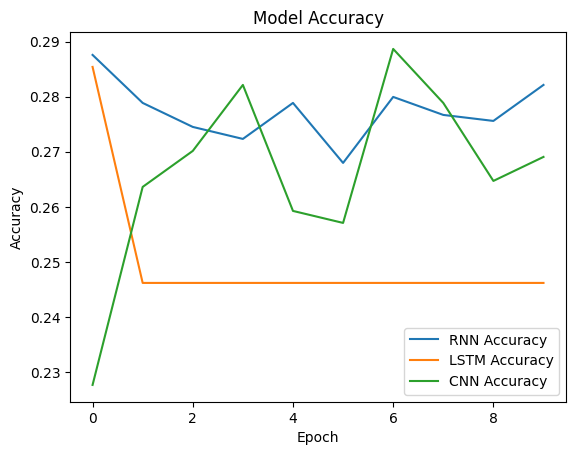

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy curves for RNN, LSTM, and CNN models
plt.plot(rnn.history['accuracy'], label='RNN Accuracy')
plt.plot(lstm.history['accuracy'], label='LSTM Accuracy')
plt.plot(cnn.history['accuracy'], label='CNN Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()